In [1]:
%pip install pandas numpy matplotlib seaborn scikit-learn xgboost streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.5/102.5 kB 1.8 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 1.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 1.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 1.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 1.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 1.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.2/731.2 kB 1.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 663.0 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 271.6/271.6 kB 2.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 1.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

print("Tout est bien installé !")


Tout est bien installé !


In [12]:
# Charger les données dans le notebook
import pandas as pd

train_df = pd.read_csv('train copy.csv')
test_df = pd.read_csv('test copy.csv')

train_df.head()


,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0


In [14]:
# Check general info
print(train_df.info())

# Check for missing values
print(train_df.isnull().sum())

# Summary statistics
train_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            2016 non-null   int64  
 1   baths           2016 non-null   float64
 2   size            2016 non-null   float64
 3   size_units      2016 non-null   object 
 4   lot_size        1669 non-null   float64
 5   lot_size_units  1669 non-null   object 
 6   zip_code        2016 non-null   int64  
 7   price           2016 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 126.1+ KB
None
beds                0
baths               0
size                0
size_units          0
lot_size          347
lot_size_units    347
zip_code            0
price               0
dtype: int64


,beds,baths,size,lot_size,zip_code,price
count,2016.000000,2016.000000,2016.000000,1669.000000,2016.000000,2.016000e+03
mean,2.857639,2.159970,1735.740575,3871.059694,98123.638889,9.636252e+05
std,1.255092,1.002023,920.132591,2719.402066,22.650819,9.440954e+05
min,1.000000,0.500000,250.000000,0.230000,98101.000000,1.590000e+05
25%,2.000000,1.500000,1068.750000,1252.000000,98108.000000,6.017500e+05
50%,3.000000,2.000000,1560.000000,4000.000000,98117.000000,8.000000e+05
75%,4.000000,2.500000,2222.500000,6000.000000,98126.000000,1.105250e+06
max,15.000000,9.000000,11010.000000,9998.000000,98199.000000,2.500000e+07


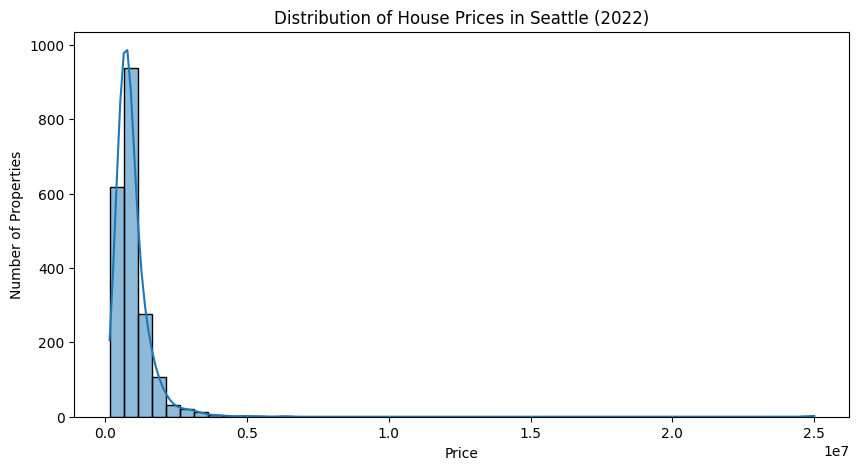

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(train_df['price'], bins=50, kde=True)
plt.title('Distribution of House Prices in Seattle (2022)')
plt.xlabel('Price')
plt.ylabel('Number of Properties')
plt.show()


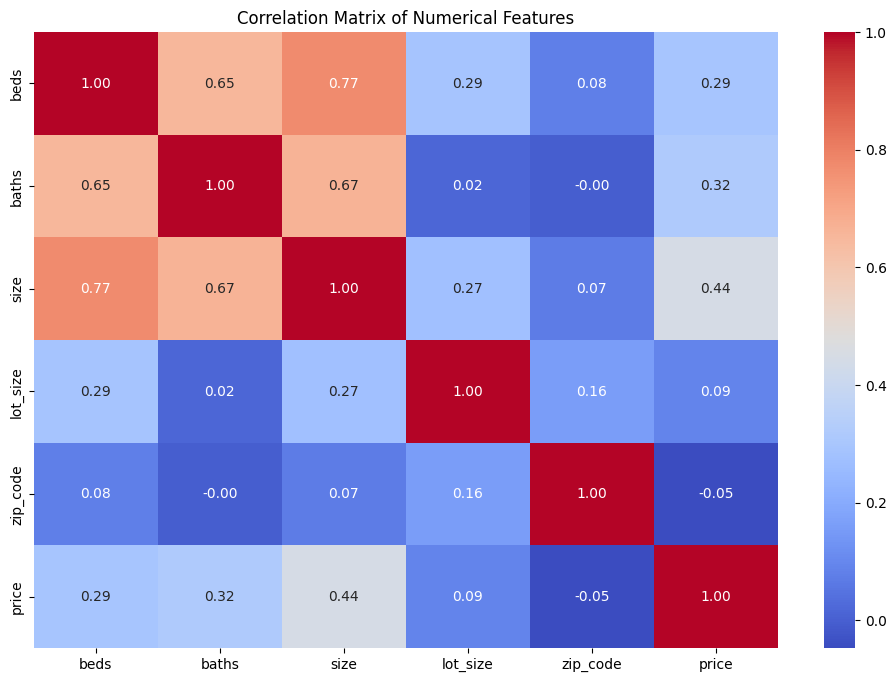

In [16]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(train_df.corr(numeric_only=True), cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


In [17]:
# Check for missing values
missing = train_df.isnull().sum()
missing[missing > 0]


lot_size          347
lot_size_units    347
dtype: int64

In [18]:
train_df['lot_size'] = train_df['lot_size'].fillna(train_df['lot_size'].median())
train_df = train_df.drop(columns=['lot_size_units'])


In [19]:
import numpy as np
import pandas as pd

# 1. Log-transform target variable (price)
train_df['log_price'] = np.log(train_df['price'])

# 2. Impute missing values in 'lot_size' with median
train_df['lot_size'] = train_df['lot_size'].fillna(train_df['lot_size'].median())

# 3. Drop irrelevant or redundant columns
train_df = train_df.drop(columns=['lot_size_units', 'id', 'date'], errors='ignore')

# 4. One-hot encode zip_code (optional but useful for modeling)
if 'zip_code' in train_df.columns:
    train_df = pd.get_dummies(train_df, columns=['zip_code'], drop_first=True)

# 5. Quick structure check
print(train_df.shape)
train_df.head()


(2016, 34)


,beds,baths,size,size_units,lot_size,price,log_price,zip_code_98102,zip_code_98103,zip_code_98104,...,zip_code_98126,zip_code_98133,zip_code_98136,zip_code_98144,zip_code_98146,zip_code_98164,zip_code_98168,zip_code_98177,zip_code_98178,zip_code_98199
0,3,2.5,2590.0,sqft,6000.00,795000.0,13.586097,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,4,2.0,2240.0,sqft,0.31,915000.0,13.726679,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,4,3.0,2040.0,sqft,3783.00,950000.0,13.764217,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,3.0,3800.0,sqft,5175.00,1950000.0,14.483340,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,2,2.0,1042.0,sqft,4000.00,950000.0,13.764217,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
train_df = train_df.drop(columns=['size_units'])


In [21]:
from sklearn.model_selection import train_test_split

# Features (exclude 'price' and 'log_price')
X = train_df.drop(columns=['price', 'log_price'])
y = train_df['log_price']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Train the model correctly with target
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict
y_pred = lr_model.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression - RMSE: {rmse:.2f}")
print(f"Linear Regression - R²: {r2:.2f}")


Linear Regression - RMSE: 0.29
Linear Regression - R²: 0.68


In [24]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - RMSE: {rmse_rf:.2f}")
print(f"Random Forest - R²: {r2_rf:.2f}")


Random Forest - RMSE: 0.25
Random Forest - R²: 0.76


In [25]:
from xgboost import XGBRegressor

# Initialize and train XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost - RMSE: {rmse_xgb:.2f}")
print(f"XGBoost - R²: {r2_xgb:.2f}")


XGBoost - RMSE: 0.23
XGBoost - R²: 0.80


/var/folders/80/jjm2ytxs61xdkwyshgkj5mwr0000gn/T/ipykernel_35125/3901715129.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp, palette='viridis')


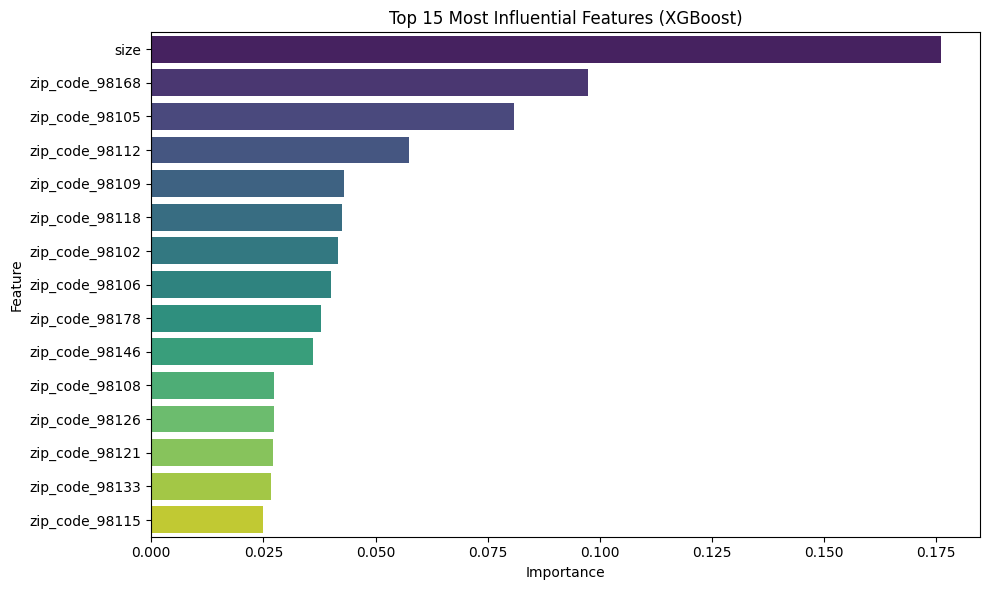

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract feature importances
importances = xgb_model.feature_importances_
features = X_train.columns

# Create DataFrame and sort
feat_imp = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False).head(15)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp, palette='viridis')
plt.title('Top 15 Most Influential Features (XGBoost)')
plt.tight_layout()
plt.show()


In [29]:
!pip install folium


In [31]:
# Extract one-hot encoded ZIP code columns
zip_columns = [col for col in train_df.columns if col.startswith("zip_code_")]

# Create a 'ZIP' column based on which one-hot ZIP is True per row
def get_zip(row):
    for col in zip_columns:
        if row[col] == True:
            return col.replace("zip_code_", "")
    return None

train_df["ZIP"] = train_df.apply(get_zip, axis=1)

# Group by ZIP and calculate average price
zip_prices = train_df.groupby("ZIP").agg({"price": "mean"}).reset_index()


In [33]:
folium.Choropleth(
    geo_data=geo_data,
    name="ZIP Code Average Prices",
    data=zip_prices,
    columns=["ZIP", "price"],
    key_on="feature.properties.ZCTA5CE10",  # Corrected key
    fill_color="YlGnBu",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Average House Price by ZIP Code (USD)"
).add_to(map_seattle)


In [34]:
map_seattle
